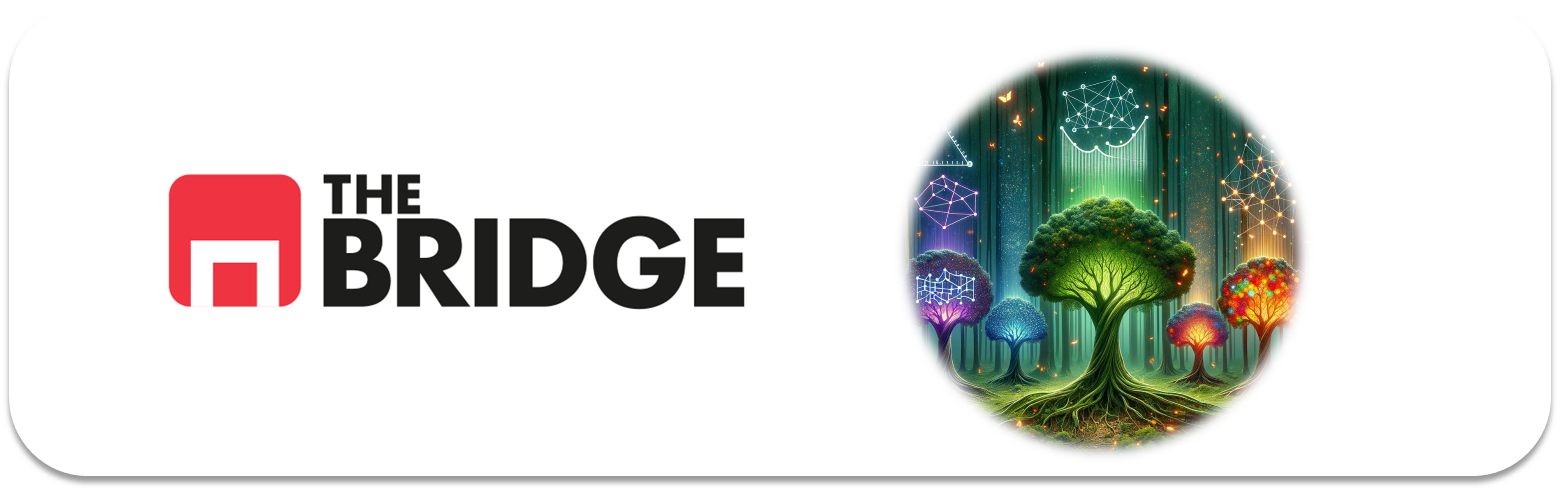

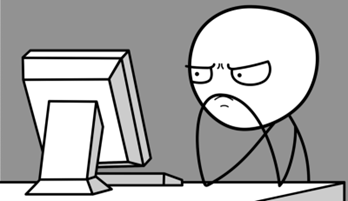

Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [107]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize = 14)
mpl.rc("xtick", labelsize = 12)
mpl.rc("ytick", labelsize = 12)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

In [108]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [109]:
X_moons

array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]])

In [110]:
y_moons

array([1, 0, 0, ..., 1, 0, 1])

<Axes: >

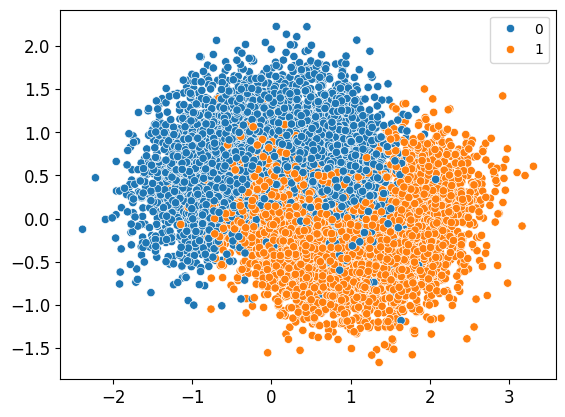

In [111]:
sns.scatterplot(x = X_moons[:,0], y = X_moons[:,1], hue = y_moons)

In [112]:
df = pd.DataFrame(X_moons, columns=[0,1])
df

,0,1
0,0.940291,0.122306
1,0.124540,-0.424775
2,0.261988,0.508414
3,-0.495238,0.072589
4,-0.879413,0.549373
...,...,...
9995,0.406096,0.389485
9996,0.188299,0.755326
9997,-0.241780,0.209572
9998,0.906796,0.549582


### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [114]:
len(X_train)

8000

### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [115]:
tree_clf = DecisionTreeClassifier(random_state=42)


### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [116]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [117]:
# 4. Realizar predicciones en el conjunto de prueba
y_pred = tree_clf.predict(X_test)

# 5. Evaluar el modelo usando classification_report
report = classification_report(y_test, y_pred, target_names=["Clase 0","Clase 1"])
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

     Clase 0       0.82      0.81      0.82      1013
     Clase 1       0.81      0.82      0.81       987

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [118]:
tree_clf_2 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=42)

### Ejercicio 6

Entrénalo, evaluálo contra test y muestra el resultado a través del classification_report.

In [119]:
tree_clf_2.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=42)

In [120]:
# 4. Realizar predicciones en el conjunto de prueba
y_pred = tree_clf_2.predict(X_test)

# 5. Evaluar el modelo usando classification_report
report = classification_report(y_test, y_pred, target_names=["Clase 0","Clase 1"])
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

     Clase 0       0.88      0.84      0.86      1013
     Clase 1       0.84      0.89      0.86       987

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



Comenta el resultado

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

In [121]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

rs.get_n_splits(X_train)

print(rs)

ShuffleSplit(n_splits=1000, random_state=42, test_size=None, train_size=100)


### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [122]:
# Crear el bosque (lista de árboles)
forest = []



In [123]:
# Entrenar árboles con subconjuntos definidos por ShuffleSplit
for i, (train_index, _) in enumerate(rs.split(X_train)):
    # Extraer subconjunto de entrenamiento
    X_subset, y_subset = X_train[train_index], y_train[train_index]

    # Crear y entrenar un árbol de decisión
    tree_clf_2 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
    tree_clf_2.fit(X_subset, y_subset)

    # Añadir el árbol entrenado al bosque
    forest.append(tree_clf_2)
    if i < 5:  # Mostrar solo las primeras iteraciones para no saturar la salida
        print(f"Árbol {i+1} entrenado con {len(X_subset)} muestras.")

Árbol 1 entrenado con 100 muestras.
Árbol 2 entrenado con 100 muestras.
Árbol 3 entrenado con 100 muestras.
Árbol 4 entrenado con 100 muestras.
Árbol 5 entrenado con 100 muestras.


### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [124]:
# Evaluar cada árbol del bosque contra el conjunto X_test
accuracies = []
for i, tree in enumerate(forest):
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    if i < 5:  # Mostrar solo las primeras iteraciones
        print(f"Precisión del árbol {i+1}: {acc:.4f}")

# Calcular y mostrar la media de las precisiones
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"\nPrecisión media de todos los árboles: {mean_accuracy:.4f}")

Precisión del árbol 1: 0.8310
Precisión del árbol 2: 0.8505
Precisión del árbol 3: 0.8370
Precisión del árbol 4: 0.8555
Precisión del árbol 5: 0.8445

Precisión media de todos los árboles: 0.8150


*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

In [125]:
consejo_arboles= []
for i, tree in enumerate(forest):
    y_pred = tree.predict(X_test)
    consejo_arboles.append(y_pred)
    if i < 5:  # Mostrar solo las primeras iteraciones
        print(f"Predicciones por arbol {i+1}: {y_pred}")


Predicciones por arbol 1: [1 1 0 ... 0 0 0]
Predicciones por arbol 2: [1 1 0 ... 0 0 0]
Predicciones por arbol 3: [1 1 0 ... 0 0 0]
Predicciones por arbol 4: [1 1 0 ... 0 0 0]
Predicciones por arbol 5: [0 1 0 ... 0 0 0]


### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [126]:
# Ejemplo de votación para la primera instancia de X_test

for i, tree in enumerate(forest):
    Y_pred_consejo = []
    votos_0 = 0
    votos_1 = 0
    for i in range(len(forest)):
        if consejo_arboles[i][0] == 0:
            votos_0 += 1
        else:
            votos_1 += 1

    if votos_0 > votos_1:
        Y_pred_consejo.append(0)
    else:
        Y_pred_consejo.append(1)
    print(f"{tree}, {Y_pred_consejo}")

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42), [1]
DecisionTreeClassifier(max_depth=5, min_

In [127]:
from scipy.stats import mode
import numpy as np

# Crear una lista de predicciones de cada árbol en el bosque
predicciones_list = [tree.predict(X_test) for tree in forest]

# Convertir las predicciones a un array de numpy
predicciones_array = np.array(predicciones_list)

# Calcular la predicción final por votación (hard-voting)
Y_pred_consejo = mode(predicciones_array, axis=0).mode[0]

# Mostrar las predicciones finales
print("Predicciones finales por votación (hard-voting):")
print(Y_pred_consejo)

Predicciones finales por votación (hard-voting):
1


### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`

In [135]:
print(len(y_test))
print(y_test)



2000
[1 1 0 ... 0 0 0]


In [140]:
print(len(consejo_arboles[0]))
print(consejo_arboles)

2000
[array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 1]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 1]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 1]), array([1, 1, 0, ..., 0, 0, 1]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 1]), array([1, 1, 0, ..., 0, 0, 1]), array([1, 1, 0, ..., 1, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 0]), array([1, 1, 0, ..., 0, 0, 1]), ar

In [148]:
from sklearn.metrics import accuracy_score

for i in range(len(y_test)):
# Evaluar las predicciones del consejo contra y_test
    accuracy_consejo = accuracy_score(y_test, consejo_arboles[i])

# Mostrar el resultado
    print(f"Precisión del consejo de árboles: {accuracy_consejo:.4f}")

Precisión del consejo de árboles: 0.8310
Precisión del consejo de árboles: 0.8505
Precisión del consejo de árboles: 0.8370
Precisión del consejo de árboles: 0.8555
Precisión del consejo de árboles: 0.8445
Precisión del consejo de árboles: 0.8270
Precisión del consejo de árboles: 0.8515
Precisión del consejo de árboles: 0.8090
Precisión del consejo de árboles: 0.7980
Precisión del consejo de árboles: 0.8370
Precisión del consejo de árboles: 0.8000
Precisión del consejo de árboles: 0.7950
Precisión del consejo de árboles: 0.8410
Precisión del consejo de árboles: 0.8415
Precisión del consejo de árboles: 0.8170
Precisión del consejo de árboles: 0.8505
Precisión del consejo de árboles: 0.7885
Precisión del consejo de árboles: 0.7960
Precisión del consejo de árboles: 0.8160
Precisión del consejo de árboles: 0.8310
Precisión del consejo de árboles: 0.8305
Precisión del consejo de árboles: 0.8375
Precisión del consejo de árboles: 0.7930
Precisión del consejo de árboles: 0.8410
Precisión del co

IndexError: list index out of range